# **Analisis en Funciones de Perdida de un Modelo**

## 1. Manejo del dataset

**1. Importacion de librerías**

In [ ]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.metrics import rmse

**2. Lectura del dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("Dataset para el analisis")
df = df.drop(df.columns[0], axis = 1)
df.head(1)

**3. Tratamiento de datos de entrada y salida**

**Datos de entrada**

In [ ]:
assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
df.dropna(inplace=True)
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df = df[indices_to_keep].astype(np.float64)

In [ ]:
df[['Datos de entrada']]

In [ ]:
X = df
X.info()

**Datos de salida**

In [ ]:
Y = df.iloc[:, [12, 13]]
Y.tail(1)

**4. Escalado de la entrada y salida de los datos mediante StandardScaler**

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.98682915, -1.61723722, -1.03665625, ..., -0.55701562,
        -0.44890419, -0.4574853 ],
       [-0.98682915, -1.61723722, -1.03665625, ..., -0.58046932,
        -0.43063942, -0.4574853 ],
       [-0.98682915, -1.61723722, -1.03665625, ..., -0.47347637,
        -0.76375376, -0.4574853 ],
       ...,
       [ 1.01334663,  1.06798685,  0.96463991, ..., -0.10967689,
         0.31241548,  2.9260415 ],
       [ 1.01334663,  1.06798685,  0.96463991, ..., -0.2008756 ,
         0.34912955,  2.92728819],
       [ 1.01334663,  1.06798685,  0.96463991, ..., -0.22824151,
         0.42503138,  2.92568637]])

In [ ]:
scalerOut = StandardScaler()
scalerOut.fit(Y)
Y_scaled = scalerOut.transform(Y)
Y_scaled

array([[ 1.45510994,  3.19284768],
       [-0.17468378,  3.29327073],
       [-1.51848735,  2.8960268 ],
       ...,
       [-0.50211603, -0.99106747],
       [-0.50105165, -1.01263056],
       [-0.45127687, -1.05461837]])

**5. Split de los datos**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y_scaled, test_size= 0.05, random_state= 2)

In [ ]:
X_train.shape

(1003, 19)

In [ ]:
X_test.shape

(53, 19)

# 2. Funciones de Implementación de los graficos


In [ ]:
def ParamsVisual_RMSE_Trainig(history_1, history_2, history_3, history_4, x_limit= None, y_limit= None):
    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)

    axL.plot(history_1.history['root_mean_squared_error'],color='blue', label="MSE - Training")
    axL.plot(history_2.history['root_mean_squared_error'],color='red', label="MAE - Training")
    axL.plot(history_3.history['root_mean_squared_error'],color='green', label="MAPE - Training")
    axL.plot(history_4.history['root_mean_squared_error'],color='black', label="RMSLE - Training")
    

    axL.set_title('RMSE vs Epoch')
    axL.set_ylabel('RMSE')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='RMSE')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

 
    plt.show()

In [ ]:
def ParamsVisual_RMSE_Test(history_1, history_2, history_3, history_4, x_limit= None, y_limit= None):
    
    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)
    axL.plot(history_1.history['val_root_mean_squared_error'],'--',color='blue', label="MSE - Test")
    axL.plot(history_2.history['val_root_mean_squared_error'],'--',color='red', label="MAE - Test")
    axL.plot(history_3.history['val_root_mean_squared_error'],'--',color='green', label="MAPE- Test")
    axL.plot(history_4.history['val_root_mean_squared_error'],'--',color='black', label="RMSLE - Test")
    

    axL.set_title('RMSE vs Epoch')
    axL.set_ylabel('RMSE')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='RMSE')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

    plt.show()


In [ ]:
def ParamsVisual_Loss_Training(history_1, history_2, history_3, history_4, x_limit= None, y_limit= None):
    
    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)
    axL.plot(history_1.history['loss'],color='blue', label="MSE - Training")
    axL.plot(history_2.history['loss'],color='red', label="MAE - Training")
    axL.plot(history_4.history['loss'],color='black', label="RMSLE - Training")

    axL.set_title('Loss vs Epoch')
    axL.set_ylabel('Loss')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='Loss')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

    plt.show()

In [ ]:
def ParamsVisual_Loss_Test(history_1, history_2, history_3, history_4, x_limit= None, y_limit= None):
    
    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)
    axL.plot(history_1.history['val_loss'],'--',color='blue', label="MSE - Test")
    axL.plot(history_2.history['val_loss'],'--',color='red', label="MAE - Test")
    axL.plot(history_4.history['val_loss'],'--',color='black', label="RMSLE - Test")

    axL.set_title('Loss vs Epoch')
    axL.set_ylabel('Loss')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='Loss')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

    plt.show()

In [ ]:
def MAPE_Loss_Training(history_1, x_limit= None, y_limit= None):

    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)

    axL.plot(history_1.history['loss'],color='green', label="MAPE - Training")

    axL.set_title('Loss vs Epoch')
    axL.set_ylabel('Loss')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='Loss')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

    plt.show()

In [ ]:
def MAPE_Loss_Test(history_1, x_limit= None, y_limit= None):

    fig, axL = plt.subplots(figsize=[17, 10],dpi=90)

    axL.plot(history_1.history['val_loss'],'--',color='green', label="MAPE - Test")

    axL.set_title('Loss vs Epoch')
    axL.set_ylabel('Loss')
    axL.set_xlabel('Epoch')
    axL.legend(loc='upper right')
    axL.grid(axis='x', color='0.95')
    axL.legend(title='Loss')

    axL.set_xlim(right=x_limit, left=0)
    axL.set_ylim(top=y_limit, bottom=0)

    plt.show()

# 3. Descripción del Modelo Ejemplo


##**MSE**

**1. Implementación del Optimizador Adam**

In [ ]:
optimizerf_1 = tf.keras.optimizers.Adam(learning_rate=0.001)

**2. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**3. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**

In [ ]:
model_1_MSE = models.Sequential()
model_1_MSE.add(layers.Dense(256, activation = 'relu'))
model_1_MSE.add(layers.Dense(512, activation = 'relu'))
model_1_MSE.add(layers.Dense(1024, activation = 'relu'))
model_1_MSE.add(layers.Dense(2048, activation = 'relu'))
model_1_MSE.add(layers.Dense(2))

In [ ]:
model_1_MSE.compile(optimizer = optimizerf_1, loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

**4. Entrenamiento del Modelo**

In [ ]:
trained_model_1_MSE = model_1_MSE.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Epoch 1/5000
27/27 [==============================] - 3s 12ms/step - loss: 0.4503 - root_mean_squared_error: 0.6711 - val_loss: 0.1055 - val_root_mean_squared_error: 0.3247
Epoch 2/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1661 - root_mean_squared_error: 0.4076 - val_loss: 0.0589 - val_root_mean_squared_error: 0.2428
Epoch 3/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0534 - root_mean_squared_error: 0.2312 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 4/5000
27/27 [==============================] - 0s 6ms/step - loss: 0.0265 - root_mean_squared_error: 0.1628 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1469
Epoch 5/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0225 - root_mean_squared_error: 0.1499 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1752
Epoch 6/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.0191 - root_mean_squared_error: 0.1383 - val_loss: 0.0189 - val

In [ ]:
y_pred_MSE = model_1_MSE.predict(X_test)
y_test_MSE = Y_test

2/2 [==============================] - 0s 4ms/step


**5. Valores de error cuadrado medio y absoluto.**

In [ ]:
mse_value, mae_value = model_1_MSE.evaluate(X_test, Y_test, verbose=1)

print("Error cuadrado medio: "+" "+str(mse_value))
print("Error absoluto medio: "+" "+str(mae_value))
print("R2: "+" "+ str(r2_score(y_test_MSE, y_pred_MSE)))
r2_MSE=r2_score(y_test_MSE, y_pred_MSE)

2/2 [==============================] - 0s 6ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756
Error cuadrado medio:  0.005708862096071243
Error absoluto medio:  0.07555701583623886
R2:  0.9947104639377572


##**MAE**

**1. Implementación del Optimizador Adam**

In [ ]:
optimizerf_2 = tf.keras.optimizers.Adam(learning_rate=0.001)

**2. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**3. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**

In [ ]:
model_1_MAE = models.Sequential()
model_1_MAE.add(layers.Dense(256, activation = 'relu'))
model_1_MAE.add(layers.Dense(512, activation = 'relu'))
model_1_MAE.add(layers.Dense(1024, activation = 'relu'))
model_1_MAE.add(layers.Dense(2048, activation = 'relu'))
model_1_MAE.add(layers.Dense(2))

In [ ]:
model_1_MAE.compile(optimizer = optimizerf_1, loss = 'mae', metrics = [tf.keras.metrics.RootMeanSquaredError()])

**4. Entrenamiento del Modelo**

In [ ]:
trained_model_1_MAE = model_1_MAE.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Epoch 1/5000
27/27 [==============================] - 1s 10ms/step - loss: 0.6804 - root_mean_squared_error: 1.1764 - val_loss: 0.3097 - val_root_mean_squared_error: 0.4238
Epoch 2/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.2701 - root_mean_squared_error: 0.4871 - val_loss: 0.2197 - val_root_mean_squared_error: 0.2987
Epoch 3/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1924 - root_mean_squared_error: 0.2778 - val_loss: 0.1749 - val_root_mean_squared_error: 0.2738
Epoch 4/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1579 - root_mean_squared_error: 0.2492 - val_loss: 0.1621 - val_root_mean_squared_error: 0.2535
Epoch 5/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1411 - root_mean_squared_error: 0.2155 - val_loss: 0.1292 - val_root_mean_squared_error: 0.1832
Epoch 6/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1247 - root_mean_squared_error: 0.1840 - val_loss: 0.1434 - val

In [ ]:
y_pred_MAE = model_1_MAE.predict(X_test)
y_test_MAE = Y_test

2/2 [==============================] - 0s 6ms/step


**5. Valores de error cuadrado medio y absoluto.**

In [ ]:
mse_value, mae_value = model_1_MAE.evaluate(X_test, Y_test, verbose=1)

print("Error cuadrado medio: "+" "+str(mse_value))
print("Error absoluto medio: "+" "+str(mae_value))
print("R2: "+" "+ str(r2_score(y_test_MAE, y_pred_MAE)))
r2_MAE=r2_score(y_test_MAE, y_pred_MAE)

2/2 [==============================] - 0s 7ms/step - loss: 0.0474 - root_mean_squared_error: 0.0720
Error cuadrado medio:  0.04739930108189583
Error absoluto medio:  0.07204457372426987
R2:  0.995446108211052


##**MAPE**

**1. Implementación del Optimizador Adam**

In [ ]:
optimizerf_3 = tf.keras.optimizers.Adam(learning_rate=0.001)

**2. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**3. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**


In [ ]:
model_1_MAPE = models.Sequential()
model_1_MAPE.add(layers.Dense(256, activation = 'relu'))
model_1_MAPE.add(layers.Dense(512, activation = 'relu'))
model_1_MAPE.add(layers.Dense(1024, activation = 'relu'))
model_1_MAPE.add(layers.Dense(2048, activation = 'relu'))
model_1_MAPE.add(layers.Dense(2))

In [ ]:
model_1_MAPE.compile(optimizer = optimizerf_1, loss = 'mape', metrics = [tf.keras.metrics.RootMeanSquaredError()])

**4. Entrenamiento del Modelo**

In [ ]:
trained_model_1_MAPE = model_1_MAPE.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Epoch 1/5000
27/27 [==============================] - 1s 12ms/step - loss: 144.6330 - root_mean_squared_error: 1.0543 - val_loss: 95.0610 - val_root_mean_squared_error: 0.9648
Epoch 2/5000
27/27 [==============================] - 0s 5ms/step - loss: 99.7401 - root_mean_squared_error: 0.9428 - val_loss: 90.9934 - val_root_mean_squared_error: 0.8766
Epoch 3/5000
27/27 [==============================] - 0s 5ms/step - loss: 97.3758 - root_mean_squared_error: 0.8534 - val_loss: 95.7331 - val_root_mean_squared_error: 0.9463
Epoch 4/5000
27/27 [==============================] - 0s 5ms/step - loss: 98.2621 - root_mean_squared_error: 0.9059 - val_loss: 93.1375 - val_root_mean_squared_error: 0.9287
Epoch 5/5000
27/27 [==============================] - 0s 5ms/step - loss: 96.5179 - root_mean_squared_error: 0.9182 - val_loss: 94.9020 - val_root_mean_squared_error: 0.9597
Epoch 6/5000
27/27 [==============================] - 0s 5ms/step - loss: 91.2705 - root_mean_squared_error: 0.8477 - val_loss: 

In [ ]:
y_pred_MAPE = model_1_MAPE.predict(X_test)
y_test_MAPE = Y_test

2/2 [==============================] - 0s 4ms/step


**5. Valores de error cuadrado medio y absoluto.**

In [ ]:
mse_value, mae_value = model_1_MAPE.evaluate(X_test, Y_test, verbose=1)

print("Error cuadrado medio: "+" "+str(mse_value))
print("Error absoluto medio: "+" "+str(mae_value))
print("R2: "+" "+ str(r2_score(y_test_MAPE, y_pred_MAPE)))
r2_MAPE=r2_score(y_test_MAPE, y_pred_MAPE)

2/2 [==============================] - 0s 6ms/step - loss: 84.5984 - root_mean_squared_error: 0.0921
Error cuadrado medio:  84.59840393066406
Error absoluto medio:  0.09206219762563705
R2:  0.9925907568961045


##**RMSLE**

**1. Implementación del Optimizador Adam**

In [ ]:
optimizerf_4 = tf.keras.optimizers.Adam(learning_rate=0.001)

**2. Desarrollo de un Early stopping para evitar el overfitting**

In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0,
    patience=250,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

**3. Estructura del modelo (En este caso es un modelo de 5 Capas con activacion Relu)**


In [ ]:
model_1_RMSLE = models.Sequential()
model_1_RMSLE.add(layers.Dense(256, activation = 'relu'))
model_1_RMSLE.add(layers.Dense(512, activation = 'relu'))
model_1_RMSLE.add(layers.Dense(1024, activation = 'relu'))
model_1_RMSLE.add(layers.Dense(2048, activation = 'relu'))
model_1_RMSLE.add(layers.Dense(2))

In [ ]:
from keras import optimizers
model_1_RMSLE.compile(optimizer = optimizerf_1, loss = keras.losses.mean_squared_logarithmic_error, metrics = [tf.keras.metrics.RootMeanSquaredError()])

**4. Entrenamiento del Modelo**

In [ ]:
trained_model_1_RMSLE = model_1_RMSLE.fit(
    x= X_train, 
    y= Y_train, 
    epochs = 5000,
    callbacks= [early_stopping],
    validation_split=0.14,
    )

Epoch 1/5000
27/27 [==============================] - 1s 11ms/step - loss: 0.2449 - root_mean_squared_error: 5.8488 - val_loss: 0.1816 - val_root_mean_squared_error: 9.5436
Epoch 2/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1972 - root_mean_squared_error: 11.5014 - val_loss: 0.1816 - val_root_mean_squared_error: 11.8186
Epoch 3/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1972 - root_mean_squared_error: 12.3536 - val_loss: 0.1816 - val_root_mean_squared_error: 11.9660
Epoch 4/5000
27/27 [==============================] - 0s 4ms/step - loss: 0.1972 - root_mean_squared_error: 12.4040 - val_loss: 0.1816 - val_root_mean_squared_error: 11.9747
Epoch 5/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1972 - root_mean_squared_error: 12.4072 - val_loss: 0.1816 - val_root_mean_squared_error: 11.9752
Epoch 6/5000
27/27 [==============================] - 0s 5ms/step - loss: 0.1972 - root_mean_squared_error: 12.4074 - val_loss: 0.1

In [ ]:
y_pred_RMSLE = model_1_RMSLE.predict(X_test)
y_test_RMSLE = Y_test

2/2 [==============================] - 0s 7ms/step


**5. Valores de error cuadrado medio y absoluto.**

In [ ]:
mse_value, mae_value = model_1_RMSLE.evaluate(X_test, Y_test, verbose=1)

print("Error cuadrado medio: "+" "+str(mse_value))
print("Error absoluto medio: "+" "+str(mae_value))
print("R2: "+" "+ str(r2_score(y_test_RMSLE, y_pred_RMSLE)))
r2_RMSLE=r2_score(y_test_RMSLE, y_pred_RMSLE)

2/2 [==============================] - 0s 10ms/step - loss: 0.2319 - root_mean_squared_error: 8.2333
Error cuadrado medio:  0.2318948358297348
Error absoluto medio:  8.23327350616455
R2:  -66.43505446096322


# 4. Análisis Grafico de las Funciones de Perdida

##**RMSE vs Epoch**

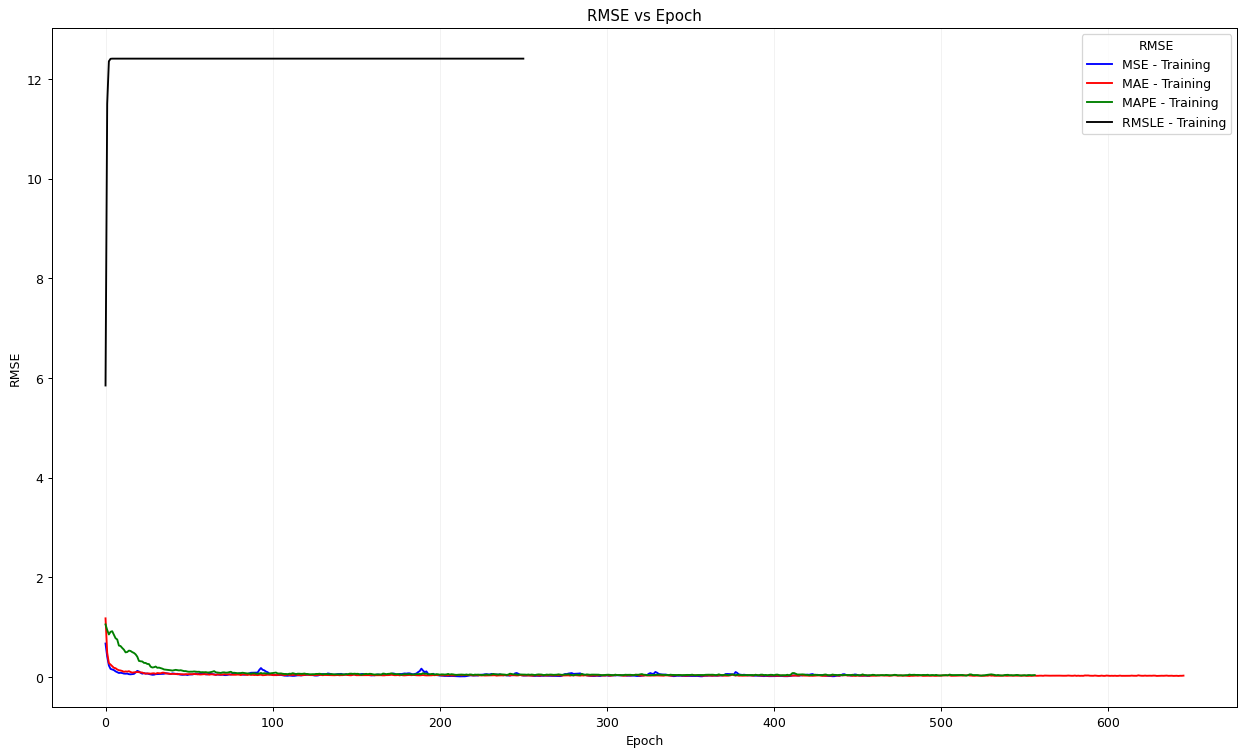

In [ ]:
ParamsVisual_RMSE_Trainig(trained_model_1_MSE, trained_model_1_MAE, trained_model_1_MAPE, trained_model_1_RMSLE)

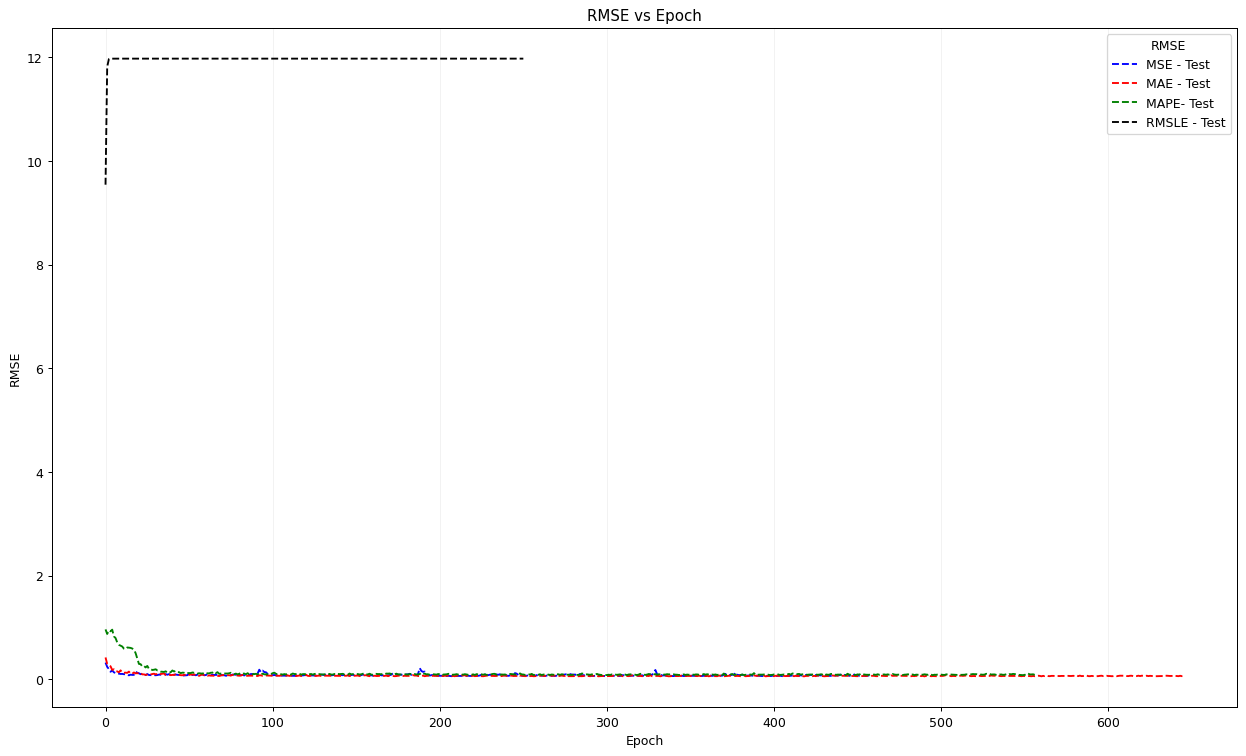

In [ ]:
ParamsVisual_RMSE_Test(trained_model_1_MSE, trained_model_1_MAE, trained_model_1_MAPE, trained_model_1_RMSLE)

##**Loss vs Epoch**

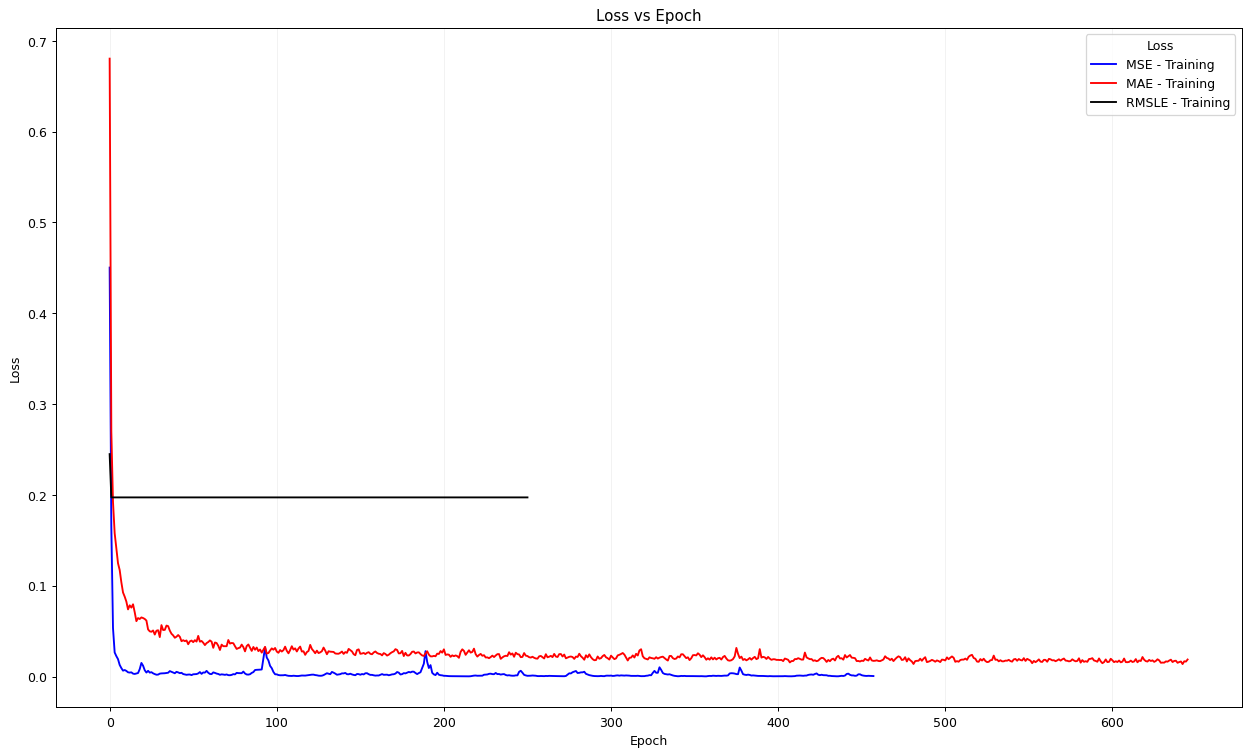

In [ ]:
ParamsVisual_Loss_Training(trained_model_1_MSE, trained_model_1_MAE, trained_model_1_MAPE, trained_model_1_RMSLE)

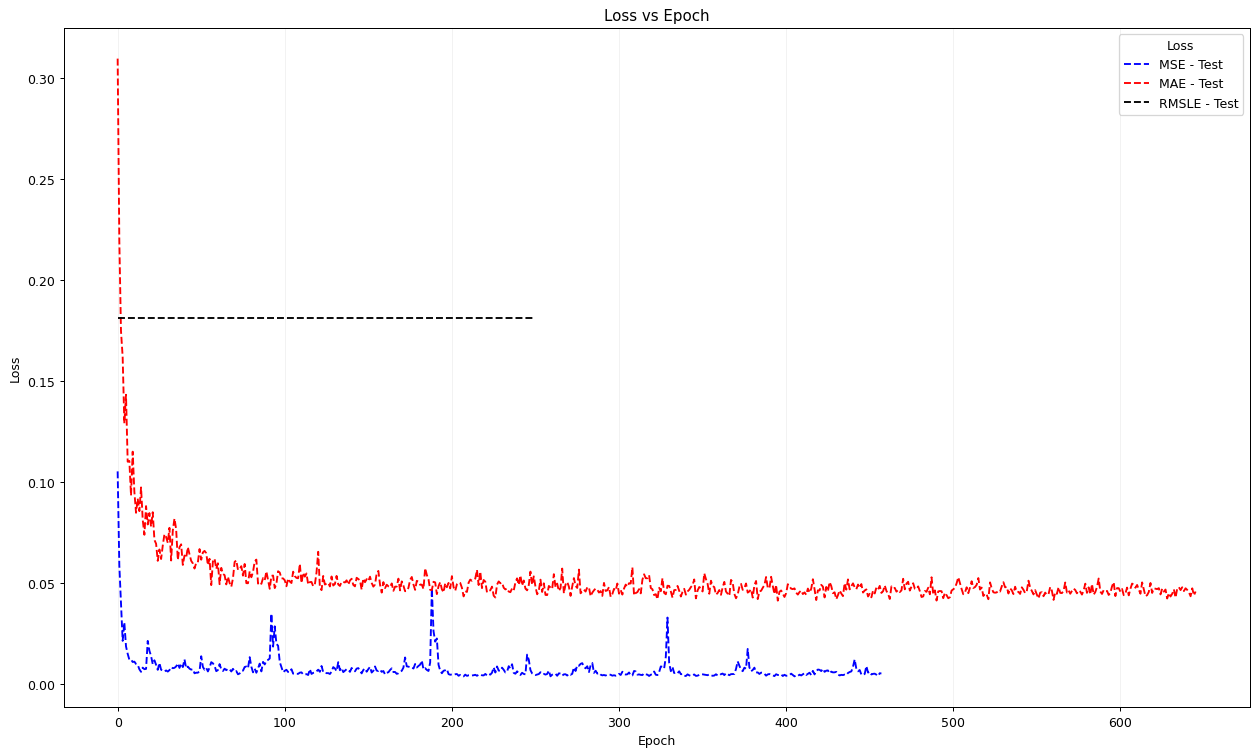

In [ ]:
ParamsVisual_Loss_Test(trained_model_1_MSE, trained_model_1_MAE, trained_model_1_MAPE, trained_model_1_RMSLE)

##**MAPE**

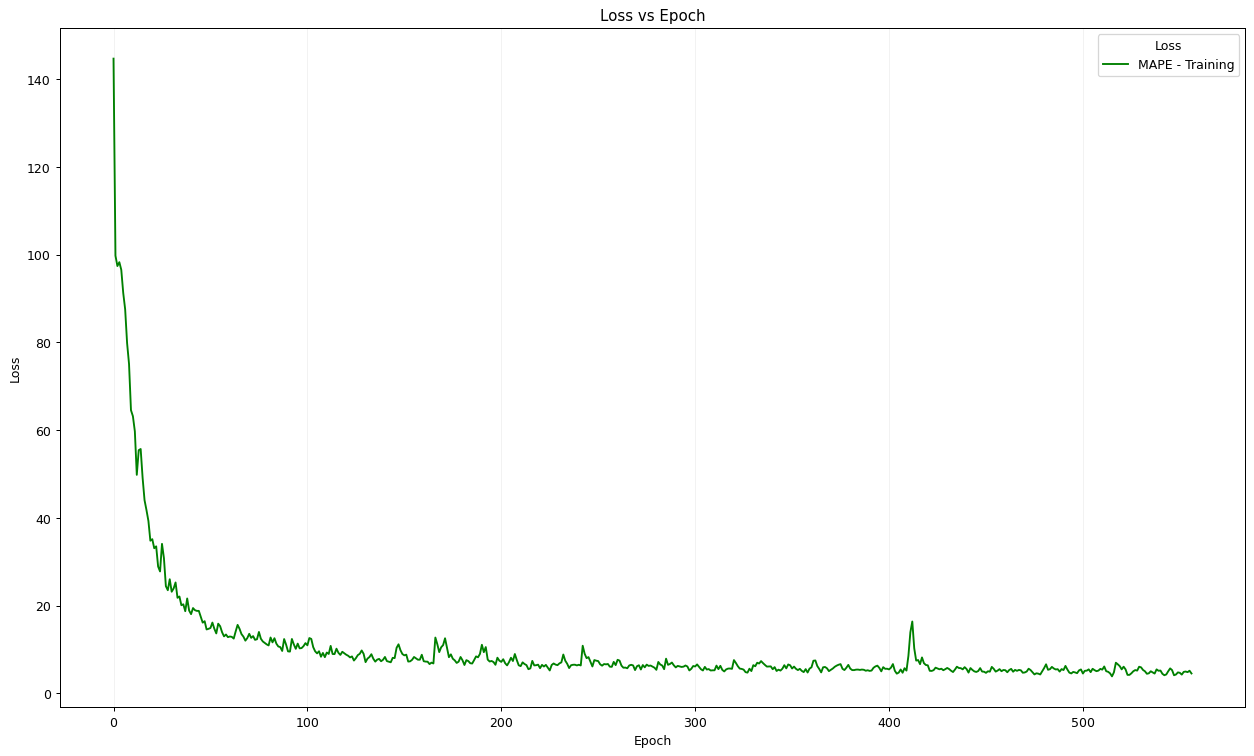

In [ ]:
MAPE_Loss_Training(trained_model_1_MAPE)

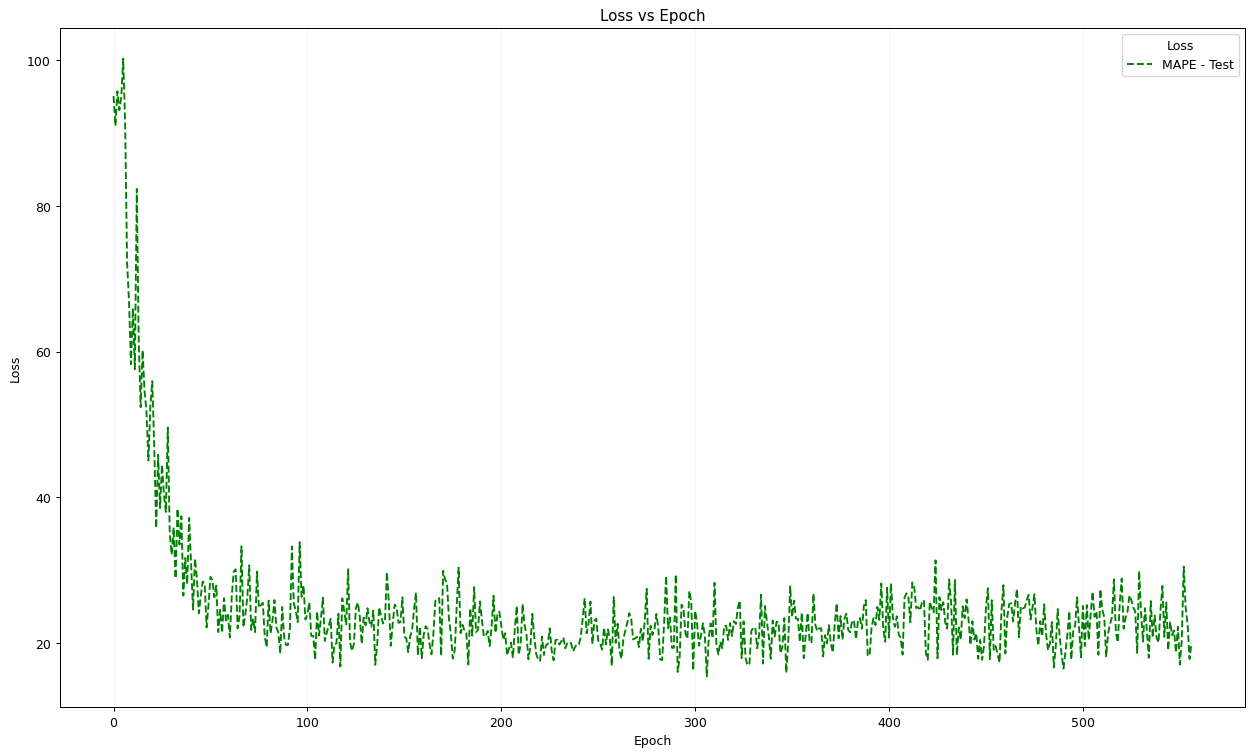

In [ ]:
MAPE_Loss_Test(trained_model_1_MAPE)